In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Data 전처리

In [119]:
df = pd.read_csv('HR Employee Attrition.csv').drop(["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], axis=1)
continuous_column = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate",
                     "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear",
                     "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

binary_column = ["Attrition", "Gender", "OverTime", "PerformanceRating"]
df[binary_column] = df[binary_column].replace({"Yes":1, "No":0, "Male":1, "Female":0, 3:0, 4:1})

category_column = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"]
df[category_column] = df[category_column].replace({"Non-Travel":0, "Travel_Rarely":1, "Travel_Frequently":2,
                                                   "Research & Development":0, "Sales":1, "Human Resources":2,
                                                   "Life Sciences":0, "Medical":1, "Marketing":2, "Technical Degree":3, "Other":4,
                                                   "Sales Executive":0, "Research Scientist":1, "Laboratory Technician":2, "Manufacturing Director":3, "Healthcare Representative":4,
                                                   "Healthcare Representitive":5, "Manager":6, "Sales Representative":7, "Research Director":8, "Human Resources":9,
                                                   "Single":0, "Married":1, "Divorced":2})

ordinary_column = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction",
                   "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]

df["NumCompaniesWorked"] = df["NumCompaniesWorked"].replace({0:1})

DecistionTreeClassifier using gini

In [120]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [121]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="gini")
fitted_dtc = dtc.fit(df.drop("Attrition",axis=1), df["Attrition"])

In [122]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(fitted_dtc, out_file="tree.dot", feature_names=df.drop("Attrition",axis=1).columns)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("DecisionTree Graph/DecisionTree Classifier using gini")

'DecisionTree Graph\\DecisionTree Classifier using gini.pdf'

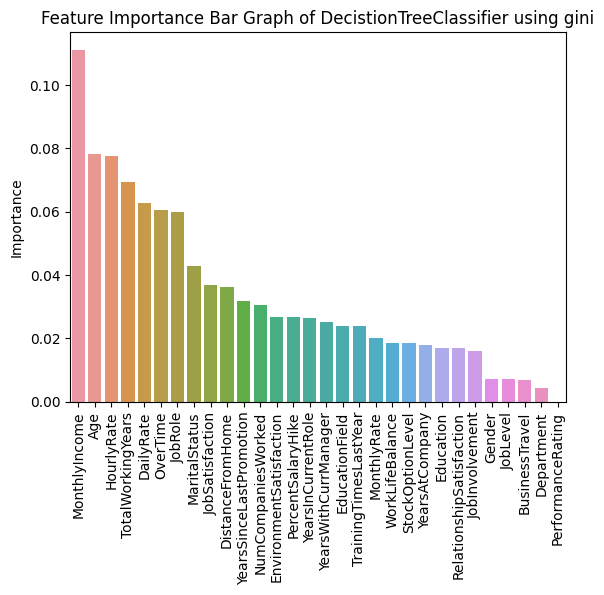

In [123]:
importance_df = pd.DataFrame(dtc.feature_importances_, columns=["Importance"], index=df.drop("Attrition",axis=1).columns).sort_values(by="Importance",ascending=False)
sns.barplot(x=importance_df.index, y=importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance Bar Graph of DecistionTreeClassifier using gini error")
plt.show()

DecisionTreeClassifier using entropy

In [124]:
dtc = DecisionTreeClassifier(criterion="entropy")
fitted_dtc = dtc.fit(df.drop("Attrition",axis=1), df["Attrition"])

In [125]:
export_graphviz(fitted_dtc, out_file="tree.dot", feature_names=df.drop("Attrition",axis=1).columns)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("DecisionTree Graph/DecisionTree Classifier using entropy")

'DecisionTree Graph\\DecisionTree Classifier using entropy.pdf'

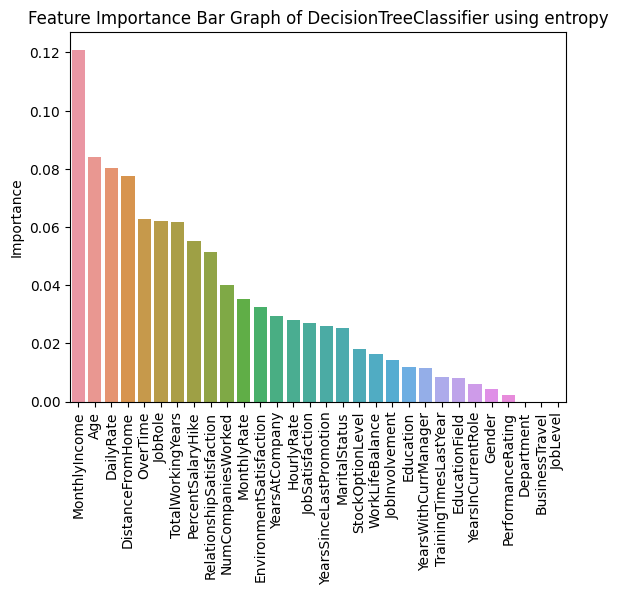

In [126]:
importance_df = pd.DataFrame(dtc.feature_importances_, columns=["Importance"], index=df.drop("Attrition",axis=1).columns).sort_values(by="Importance",ascending=False)
sns.barplot(x=importance_df.index, y=importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance Bar Graph of DecisionTreeClassifier using entropy error")
plt.show()

DecisionTreeRegressor using squred error

In [127]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="squared_error")
fitted_dtr = dtr.fit(df.drop("Attrition",axis=1), df["Attrition"])

In [128]:
export_graphviz(fitted_dtr, out_file="tree.dot", feature_names=df.drop("Attrition",axis=1).columns)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("DecisionTree Graph/DecisionTree Regressor using squared error")

'DecisionTree Graph\\DecisionTree Regressor using squared error.pdf'

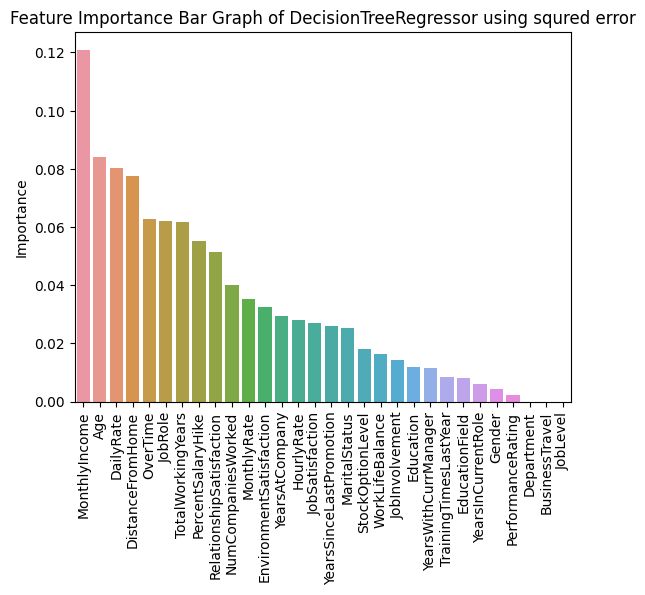

In [129]:
importance_df = pd.DataFrame(dtc.feature_importances_, columns=["Importance"], index=df.drop("Attrition",axis=1).columns).sort_values(by="Importance",ascending=False)
sns.barplot(x=importance_df.index, y=importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance Bar Graph of DecisionTreeRegressor using squred error")
plt.show()

DecisionTreeRegressor using absolute error

In [130]:
dtr = DecisionTreeRegressor(criterion="absolute_error")
fitted_dtr = dtr.fit(df.drop("Attrition",axis=1), df["Attrition"])

export_graphviz(fitted_dtr, out_file="tree.dot", feature_names=df.drop("Attrition",axis=1).columns)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("DecisionTree Graph/DecisionTree Regressor using absolute_error")

'DecisionTree Graph\\DecisionTree Regressor using absolute_error.pdf'

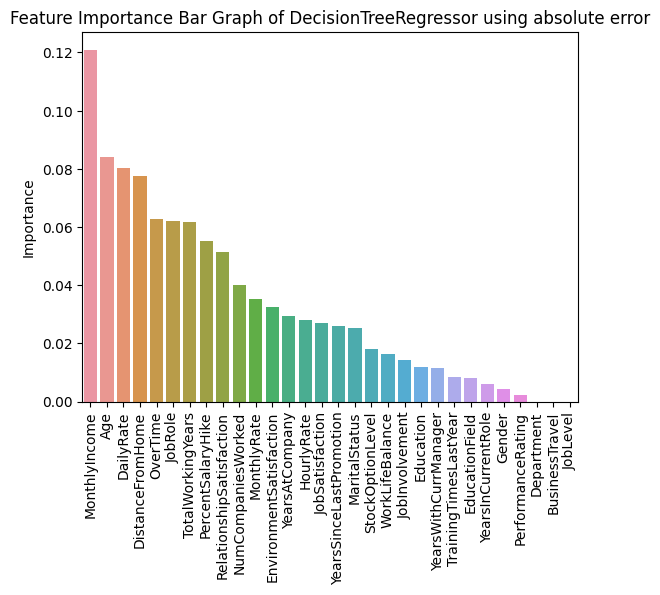

In [131]:
importance_df = pd.DataFrame(dtc.feature_importances_, columns=["Importance"], index=df.drop("Attrition",axis=1).columns).sort_values(by="Importance",ascending=False)
sns.barplot(x=importance_df.index, y=importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance Bar Graph of DecisionTreeRegressor using absolute error")
plt.show()

DecisionTreeRegressor using friedman_mse error

In [132]:
dtr = DecisionTreeRegressor(criterion="friedman_mse")
fitted_dtr = dtr.fit(df.drop("Attrition",axis=1), df["Attrition"])

export_graphviz(fitted_dtr, out_file="tree.dot", feature_names=df.drop("Attrition",axis=1).columns)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("DecisionTree Graph/DecisionTree Regressor using friedman_mse error")

'DecisionTree Graph\\DecisionTree Regressor using friedman_mse error.pdf'

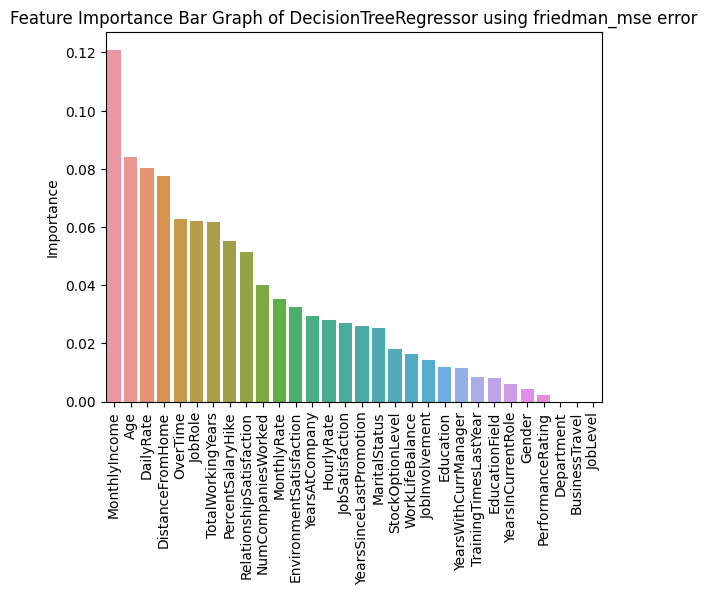

In [133]:
importance_df = pd.DataFrame(dtc.feature_importances_, columns=["Importance"], index=df.drop("Attrition",axis=1).columns).sort_values(by="Importance",ascending=False)
sns.barplot(x=importance_df.index, y=importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance Bar Graph of DecisionTreeRegressor using friedman_mse error")
plt.show()

DecisionTreeRegressor using poisson error

In [134]:
dtr = DecisionTreeRegressor(criterion="poisson")
fitted_dtr = dtr.fit(df.drop("Attrition",axis=1), df["Attrition"])

export_graphviz(fitted_dtr, out_file="tree.dot", feature_names=df.drop("Attrition",axis=1).columns)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("DecisionTree Graph/DecisionTree Regressor using poisson error")

'DecisionTree Graph\\DecisionTree Regressor using poisson error.pdf'

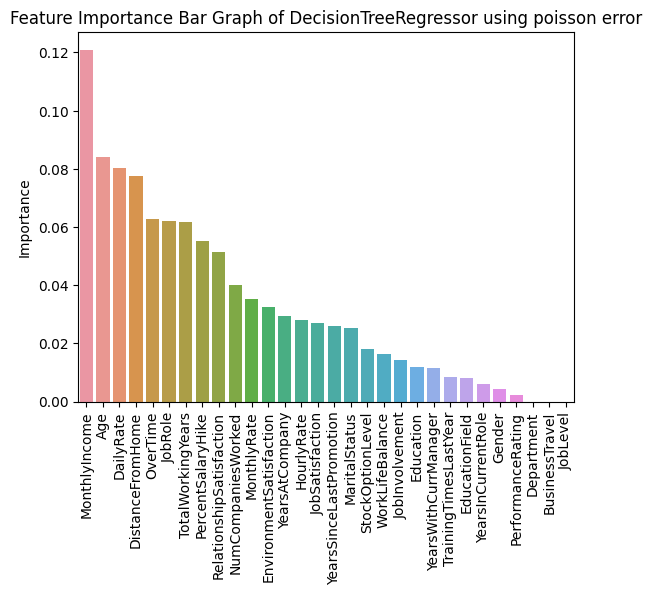

In [135]:
importance_df = pd.DataFrame(dtc.feature_importances_, columns=["Importance"], index=df.drop("Attrition",axis=1).columns).sort_values(by="Importance",ascending=False)
sns.barplot(x=importance_df.index, y=importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance Bar Graph of DecisionTreeRegressor using poisson error")
plt.show()

RandomForestClassifier using gini error

In [139]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion="gini")
fitted_rfc = rfc.fit(df.drop("Attrition",axis=1), df["Attrition"])

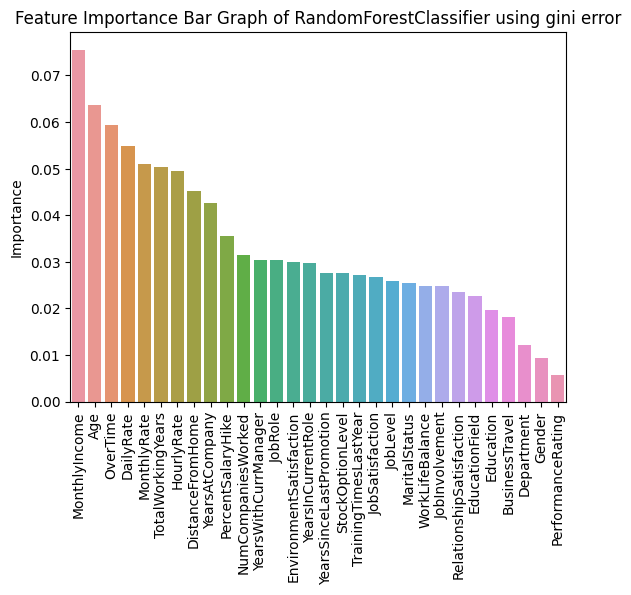

In [142]:
importance_df = pd.DataFrame(rfc.feature_importances_, columns=["Importance"], index=df.drop("Attrition",axis=1).columns).sort_values(by="Importance",ascending=False)
sns.barplot(x=importance_df.index, y=importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance Bar Graph of RandomForestClassifier using gini error")
plt.show()

RandomForestClassifier using entropy error

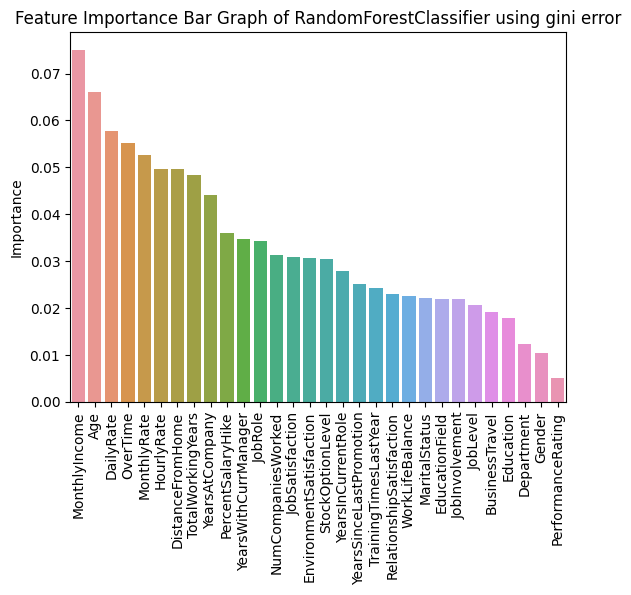

In [143]:
rfc = RandomForestClassifier(criterion="entropy")
fitted_rfc = rfc.fit(df.drop("Attrition",axis=1), df["Attrition"])

importance_df = pd.DataFrame(rfc.feature_importances_, columns=["Importance"], index=df.drop("Attrition",axis=1).columns).sort_values(by="Importance",ascending=False)
sns.barplot(x=importance_df.index, y=importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance Bar Graph of RandomForestClassifier using gini error")
plt.show()

RandomForestRegressor using squared error

In [146]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(criterion="squared_error")
fitted_rfr = rfr.fit(df.drop("Attrition",axis=1), df["Attrition"])

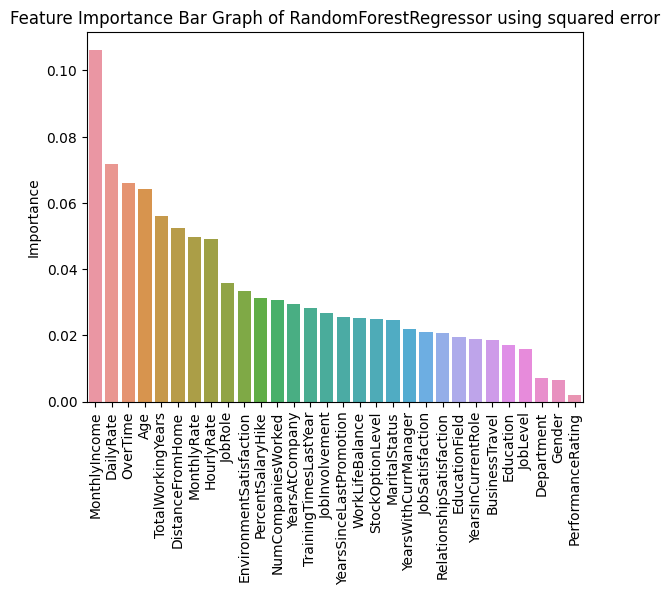

In [148]:
importance_df = pd.DataFrame(rfr.feature_importances_, columns=["Importance"], index=df.drop("Attrition",axis=1).columns).sort_values(by="Importance",ascending=False)
sns.barplot(x=importance_df.index, y=importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance Bar Graph of RandomForestRegressor using squared error")
plt.show()

RandomForestRegressor using absolute error

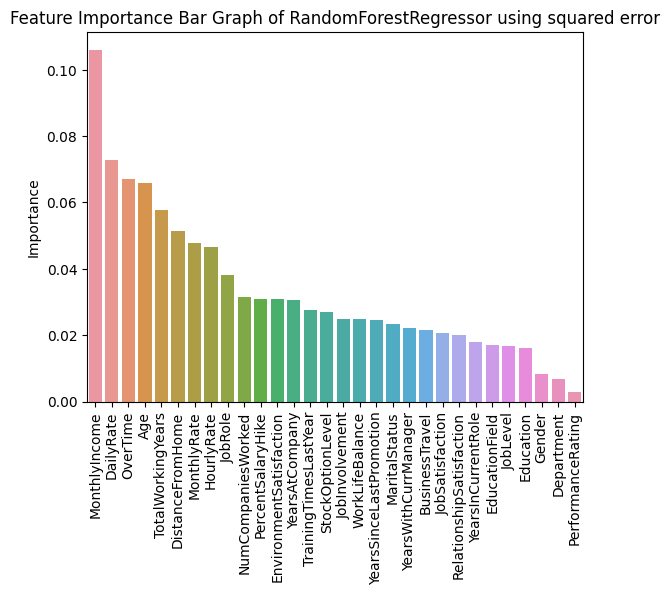

In [149]:
rfr = RandomForestRegressor(criterion="squared_error")
fitted_rfr = rfr.fit(df.drop("Attrition",axis=1), df["Attrition"])

importance_df = pd.DataFrame(rfr.feature_importances_, columns=["Importance"], index=df.drop("Attrition",axis=1).columns).sort_values(by="Importance",ascending=False)
sns.barplot(x=importance_df.index, y=importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance Bar Graph of RandomForestRegressor using absolute error")
plt.show()

RandomForestRegressor using friedman_mse error

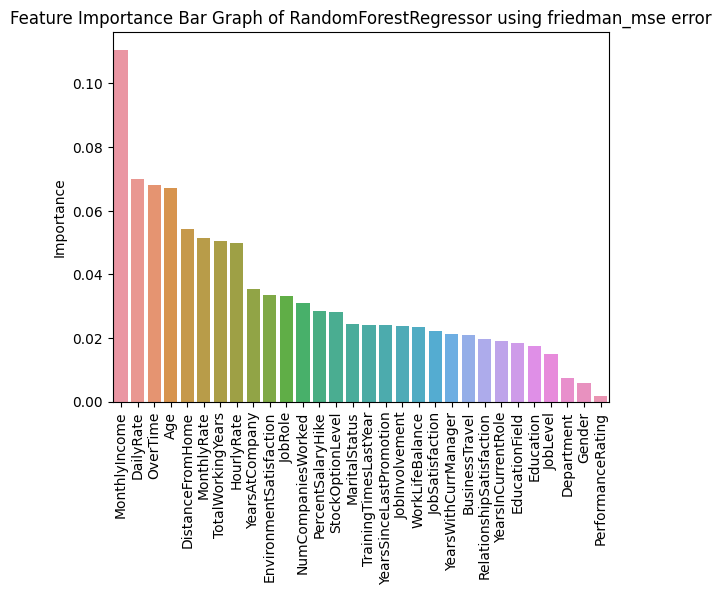

In [150]:
rfr = RandomForestRegressor(criterion="squared_error")
fitted_rfr = rfr.fit(df.drop("Attrition",axis=1), df["Attrition"])

importance_df = pd.DataFrame(rfr.feature_importances_, columns=["Importance"], index=df.drop("Attrition",axis=1).columns).sort_values(by="Importance",ascending=False)
sns.barplot(x=importance_df.index, y=importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance Bar Graph of RandomForestRegressor using friedman_mse error")
plt.show()

RandomForestRegressor using poisson error

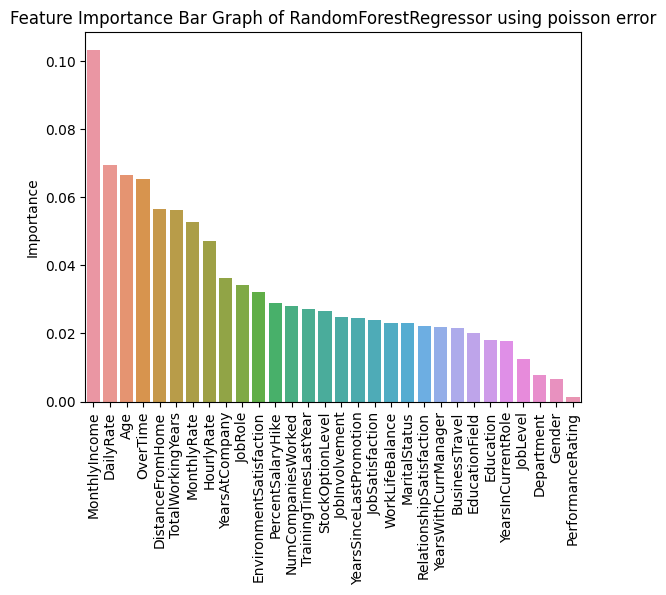

In [151]:
rfr = RandomForestRegressor(criterion="squared_error")
fitted_rfr = rfr.fit(df.drop("Attrition",axis=1), df["Attrition"])

importance_df = pd.DataFrame(rfr.feature_importances_, columns=["Importance"], index=df.drop("Attrition",axis=1).columns).sort_values(by="Importance",ascending=False)
sns.barplot(x=importance_df.index, y=importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance Bar Graph of RandomForestRegressor using poisson error")
plt.show()